##Welcome to my Notebook.
This Notebook is made for the project for credit score classification. The dataset for this project is taken from [this Kaggle page](https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv). 
The goal of this project is to predict and identify the score category of a person.  
As we move forward in the notebooke, I describe the different understanding that I gain by divning in the dataset. 

Before everything, I have to connect to my google drive to use my storage.

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Then I have to locate my train and test set to work on.

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Credit_Score_Project/"

Before moving any further, let's go through some introduction.

#<b style=color:green>Introduction</b>

Let's say that we are working for a financial institution (like a fund or bank, Visa card or Master card). Their process is to give credit to customers. The process of allocating a credit limit to a certain customer is somehow done and we don't talk about it. But as the time passes, some clients have a good behaviour and some don't. Some return their debt on time and some just stack them up until they get broke. 

###Business Objective:

After running and collecting a certain number of transactions by our financial company, now they have decided to create a computer model for classifing a customer at the end of a financial period. The categories of a customer can be good, standard, or poor. 

Project Tasks:

<ol>
<li>To repare the train dataset, which includes cleaning, modifing, normalizing, etc.</li>
<li>To do some expolaratory data analysis (EDA) and to check the relation of features with each other.</li>
<li>To create a model (or models) with an appropriate algorithm, using the train dataset, and to let the machine learn the bahaviours of customers. </li>
<li>To get the accuracy of the model (and other metrics) to identify its performance.</li>
<li>To modify the hyperparameters of the model and tune it, hoping to reach a better performance, while tring to avoid bias, variation and overfitting</li>
<li>Tinally, to run the model on the test dataset and to see how the model performs.</li>

______________

###Libraries

In [3]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# SK-Learn
from sklearn.preprocessing import LabelEncoder

# Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

# Ignoring Warnngs 
import warnings
warnings.filterwarnings("ignore")

# SKLearn libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import feature_selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import roc_curve, auc

# Tensorflow for Neural Network 
import tensorflow as tf


Then I am going to read the train file and save it in a dataframe parameter. 

In [4]:
df = pd.read_csv(path+"train.csv")
# Cheking the head of the dataset. 
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Let's now see the dimensions of the dataset. 

In [5]:
df.shape

(100000, 28)

So we have 28 columns, one of which is the target variable, and 27 independent variable. But we will see how many of them are of use. 

##Task 1: Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

There are four columns that are of no use: ID, Customer_ID, Name, and SSN. I remove them.

In [7]:
df.drop(columns=["ID", "Name", "SSN"], inplace=True)

Let's see if there is any duplicated record in the dataset. 

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Now that we know the Null values of each feature, we can dive into each one seperately.

###Month

In [10]:
df["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

I am creating a function to perform the task of encoding in a way that if I want to keep the order of the original values or discard it, I can do that way. It also let us to decide the starting number. 

In [11]:
def encode_var(df, var, sorted_=True, start_with=1):
    '''
    This function encodes and replace the values of a categorical variable with 
    coresponding numbers from user's arbitrary starting point (start_with) 
    with the length of number of unique items in the variable.
    '''
    # Getting the list of unique values of the spesified variable
    if sorted_:
        list_var = np.sort(df[var].unique()) # To sort the list (eg.alfabetically)
    else:
        list_var = df[var].unique()
    
    # Creating a list of numbers coresponding to the variable items, starting at 1
    list_var_nums = range(start_with, len(list_var) + start_with)
    # Creating a dictionary of each unique item and its coresponding number
    var_dict = {list_var[i]: list_var_nums[i] for i in range(len(list_var))}

    # This is the final list that keeps the results
    encoded_list = []

    # Saving the coresponding numbers in the returning list
    for item in df[var]:
        encoded_list.append(var_dict[item])
        # df.replace(item, var_dict[item])
    
    return encoded_list

In [12]:
df["Month"] = encode_var(df, "Month")

In [13]:
df["Month"].value_counts()

4    12500
3    12500
7    12500
1    12500
8    12500
6    12500
5    12500
2    12500
Name: Month, dtype: int64

###Age

In [14]:
def get_3Indexes_By_Column_Value(df, col, val):
    main_index = df[df[col]==val].index
    previous_index = main_index - 1
    following_index = main_index + 1

    index_list = []
    for i in range(max(1,(len(main_index)-1))):
        index_list.append(previous_index[i])
        index_list.append(main_index[i])
        index_list.append(following_index[i])
    # return np.concatenate(previous_index, main_index, following_index).sort().unique()
    index_list = np.unique(index_list)
    return index_list


In [15]:
def value_filler(df, col_name=None, col_num=None, missed_val=None):
    '''
    This function fills given missing values of a given column name from a given
    dataframe by finding other values of the same column and replacing it with
    the missed value. 
    '''

    # Getting a list of indexes of missing value records along with their prior and later records
    index_list = get_3Indexes_By_Column_Value(df, col_name, missed_val)

    # Catching the unique customer_ids of the dataframe wherein the col_name has missed_val
    Cust_IDs = df.iloc[index_list]["Customer_ID"].unique()

    for id in Cust_IDs:
        # Fetching all the unique values of the col_name for each Customer_id and their indexes
        values = df[df["Customer_ID"]==id][col_name].unique()
        ids = df[df["Customer_ID"]==id].index

        # Getting the correct value of the col_name by removing the missed_value from previous step 
        idx = np.where(values!=missed_val)[0][0]
        correct_value = values[idx]
        
        # Replacing the missed_value with correct_value 
        df.iloc[ids, col_num] = correct_value

    return df

By taking a look at the Age column, we may notice that:
<ol>
<li>Its type is not integer.
<li>Some of them contain "_" in them.
<li>Some of them are negative number, more precisely -500.
<li>Those who are -500, are the ones that are equal to their following ones(at least) or their previous ones (for some cases). 
</ol>
So I want to clear this mess up.

In [16]:
# Getting rid of "_" in the column
df["Age"] = df["Age"].str.replace("_","")

In [17]:
# Changing the type of column to integer
df["Age"] = pd.to_numeric(df["Age"]) 

In [18]:
# Also changeing the ages above 60 to negative 500, as they are not real ages
for i in range(len(df)):
    if df["Age"][i] > 60:
        df["Age"][i] = -500

In [19]:
# Getting the number of negative ones
df[df["Age"] <= 0]["Age"].value_counts()

-500    2781
Name: Age, dtype: int64

In [20]:
# Creating a dataframe for each customer id with the highest age, since all the abnormal high ages turned into -500
real_ages = pd.DataFrame(df.groupby("Customer_ID")["Age"].max())

In [21]:
# Replacing the -500 ages with real ones 
for i in range(len(df)):
    if df["Age"][i] == -500:
        id = df["Customer_ID"][i]
        df["Age"][i] = real_ages.loc[id]

In [22]:
df[df["Age"]<0].shape

(0, 25)

Now Age is cleared. 

###Occupation

In [23]:
df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [24]:
# Making three different dataframes with groupby based on customer id and 
#aggregating with three different state, first, second, and last occupation 
#in the main daataframe
real_occupation_first = pd.DataFrame(df.groupby("Customer_ID")["Occupation"].first()) 
real_occupation_last = pd.DataFrame(df.groupby("Customer_ID")["Occupation"].last())
real_occupation_1 = pd.DataFrame(df.groupby("Customer_ID")["Occupation"].nth(1))
real_occupation_2 = pd.DataFrame(df.groupby("Customer_ID")["Occupation"].nth(2))
real_occupation_2.head()

,Occupation
Customer_ID,
CUS_0x1000,Lawyer
CUS_0x1009,Mechanic
CUS_0x100b,Media_Manager
CUS_0x1011,Doctor
CUS_0x1013,Mechanic


In [25]:
for i in range(len(df)):
    if df["Occupation"][i] == "_______":
        id = df["Customer_ID"][i]
        if (real_occupation_first.loc[id] != "_______")[0]:
            # print(id)
            df["Occupation"][i] = (real_occupation_first.loc[id])[0]
        elif (real_occupation_last.loc[id] != "_______")[0]:
            # print(i)
            df["Occupation"][i] = (real_occupation_last.loc[id])[0]
        elif (real_occupation_1.loc[id] != "_______")[0]:
            df["Occupation"][i] = (real_occupation_1.loc[id])[0]
        else:
            df["Occupation"][i] = (real_occupation_2.loc[id])[0]
        

###Annual_Income

In [26]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")

In [27]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"])

In [28]:
df["Annual_Income"].value_counts()

17816.75       16
22434.16       16
40341.16       16
17273.83       16
109945.32      16
               ..
17079092.00     1
1910572.00      1
20179076.00     1
7980216.00      1
8299495.00      1
Name: Annual_Income, Length: 13487, dtype: int64

###Monthly_Inhand_Salary

In [29]:
df["Monthly_Inhand_Salary"].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [228]:
# Turning the value of Monthly_Inhand_Salary more than 10 to -100
df["Monthly_Inhand_Salary"]= df["Monthly_Inhand_Salary"].fillna(-100)

# Getting the indexes of those with -100 value for Monthly_Inhand_Salary, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df.iloc[1:,:],"Monthly_Inhand_Salary",-100)

# Creating a dataframe with unique customer id and mean of Monthly_Inhand_Salary available 
bank_acc_df = pd.DataFrame(df.iloc[idx,[0,5]].groupby("Customer_ID").mean())

# Replacing any -100 number in df Monthly_Inhand_Salary assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Monthly_Inhand_Salary"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Monthly_Inhand_Salary"][indx] = bank_acc_df.loc[id,"Monthly_Inhand_Salary"]

In [229]:
df[df["Monthly_Inhand_Salary"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


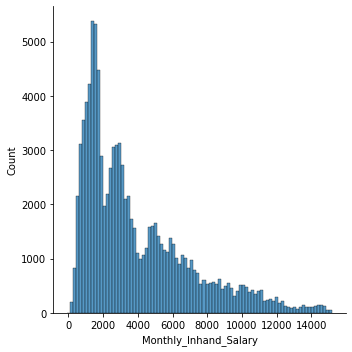

In [32]:
sns.displot(data=df, x="Monthly_Inhand_Salary")
plt.show()

###Num_Bank_Accounts

In [33]:
df["Num_Bank_Accounts"].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [34]:
# Let's see the mean, median, and mode of the number of bank account for cases 
print(df["Num_Bank_Accounts"].mean(), df["Num_Bank_Accounts"].median(), df["Num_Bank_Accounts"].mode())

17.09128 6.0 0    6
dtype: int64


So the mean is so much deviated and skewd from the median and mode, and that is because of the larg number of some cases. 

In [35]:
# Total cases with more than 10 account numbers (which is really rare)
df[df["Num_Bank_Accounts"]>10]["Num_Bank_Accounts"].size

1324

Only 1.3% of cases own more than 10 bank account. 
So I figure them out now. 

In [230]:
# Turning the value of nomber of bank accounts more than 10 to -1
for i in range(len(df)):
    if df["Num_Bank_Accounts"][i] >10:
        df["Num_Bank_Accounts"][i] = -1

# Getting the indexes of those with -1 value for number of bank accounts, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Num_Bank_Accounts",-1)

# Creating a dataframe with unique customer id and maximum number of bank accounut available 
bank_acc_df = pd.DataFrame(df.iloc[idx,[0,6]].groupby("Customer_ID").max())
bank_acc_df.head()

# Replacing any -1 number in df number of bank account assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Num_Bank_Accounts"][indx] == -1:
        id = df["Customer_ID"][indx]
        df["Num_Bank_Accounts"][indx] = bank_acc_df.loc[id,"Num_Bank_Accounts"]

In [231]:
df[df["Num_Bank_Accounts"] == -1]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


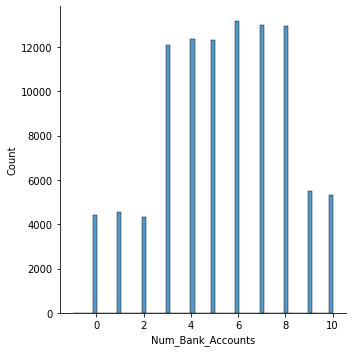

In [38]:
sns.displot(data=df, x="Num_Bank_Accounts")
plt.show()

###Num_Credit_Card

In [39]:
df["Num_Credit_Card"].value_counts()


5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [40]:
# Let's see the mean, median, and mode of the number of credit card for cases 
print(df["Num_Credit_Card"].mean(),"|", df["Num_Credit_Card"].median(),"|", df["Num_Credit_Card"].std(),"|", df["Num_Credit_Card"].mode())

22.47443 | 5.0 | 129.05741011009846 | 0    5
dtype: int64


Like the number of bank account, number of credit cards are skewd. 

In [41]:
# Total cases with more than 10 account numbers (which is really rare)
df[df["Num_Credit_Card"]>10]["Num_Credit_Card"].size

2307

Here also only roughly 2.3% of the data hold more than 10 credit cards. The rest should be corrected. 

In [232]:
# Turning the value of nomber of credit card more than 10 to -1
for i in range(len(df)):
    if df["Num_Credit_Card"][i] >10:
        df["Num_Credit_Card"][i] = -1

# Getting the indexes of those with -1 value for number of credit card, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Num_Credit_Card",-1)

# Creating a dataframe with unique customer id and maximum number of credit card available 
credit_card_df = pd.DataFrame(df.iloc[idx,[0,7]].groupby("Customer_ID").max())

# Replacing any -1 number in df number of credit card that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Num_Credit_Card"][indx] == -1:
        id = df["Customer_ID"][indx]
        df["Num_Credit_Card"][indx] = credit_card_df.loc[id,"Num_Credit_Card"]

In [233]:
df[df["Num_Credit_Card"] == -1]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


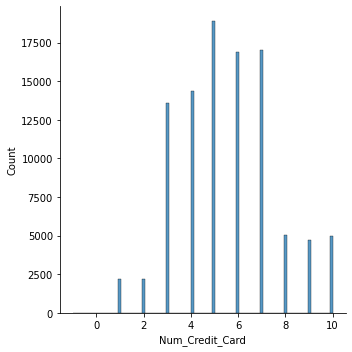

In [44]:
sns.displot(data=df, x="Num_Credit_Card")
plt.show()

###Interest_Rate

In [45]:
df["Interest_Rate"].value_counts().sort_index()

1       2683
2       2465
3       2765
4       2589
5       4979
        ... 
5775       1
5776       1
5788       1
5789       1
5797       1
Name: Interest_Rate, Length: 1750, dtype: int64

In [46]:
df[df["Interest_Rate"]>34].shape

(2034, 25)

2% of data have interest rate of more than 100%.

In [47]:
# Let's see the mean, median, and mode of Interest_Rate for cases 
print(df["Interest_Rate"].mean(),"|", df["Interest_Rate"].median(),"|", df["Interest_Rate"].std(),"|", df["Interest_Rate"].mode())

72.46604 | 13.0 | 466.4226212217138 | 0    8
dtype: int64


In [234]:
# Turning the value of nomber of interest rate more than 34 to -1
for i in range(len(df)):
    if df["Interest_Rate"][i] >34:
        df["Interest_Rate"][i] = -1

# Getting the indexes of those with -1 value for interest rate, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Interest_Rate",-1)

# Creating a dataframe with unique customer id and maximum number of interest rate available 
interest_rate_df = pd.DataFrame(df.iloc[idx,[0,8]].groupby("Customer_ID").max())

# Replacing any -1 number in df number of interest rate that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Interest_Rate"][indx] == -1:
        id = df["Customer_ID"][indx]
        df["Interest_Rate"][indx] = interest_rate_df.loc[id,"Interest_Rate"]

In [235]:
df[df["Interest_Rate"] == -1]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


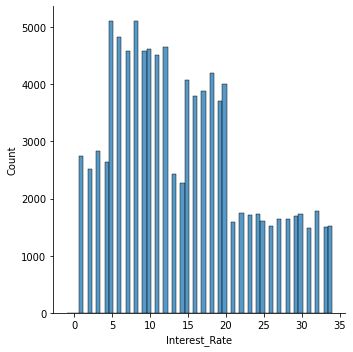

In [50]:
sns.displot(data=df, x="Interest_Rate")
plt.show()

###Num_of_Loan

In [51]:
df["Num_of_Loan"].value_counts()

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

In [52]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")

In [53]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"])

In [54]:
print(df["Num_of_Loan"].mean(),"|", df["Num_of_Loan"].median(),"|", df["Num_of_Loan"].std() , "|", df["Num_of_Loan"].mode())

3.00996 | 3.0 | 62.647879360488204 | 0    3
dtype: int64


In [55]:
df[df["Num_of_Loan"]>15]["Num_of_Loan"].nunique()

403

In [56]:
df[df["Num_of_Loan"]>15]["Num_of_Loan"].shape

(472,)

In [57]:
df[df["Num_of_Loan"]<=15]["Num_of_Loan"].unique()

array([   4,    1,    3, -100,    0,    2,    7,    5,    6,    8,    9])

Looks like that the real number of loans are a range of 0 to 9. So the rest should turn to either of this range. 

In [236]:
# Turning the value of nomber of loan more than 34 to -1
for i in range(len(df)):
    if df["Num_of_Loan"][i] >9:
        df["Num_of_Loan"][i] = -100

# Getting the indexes of those with -1 value for nomber of loan, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Num_of_Loan",-100)

# Creating a dataframe with unique customer id and maximum number of nomber of loan available 
Num_of_Loan_df = pd.DataFrame(df.iloc[idx,[0,9]].groupby("Customer_ID").max())

# Replacing any -100 number in df number of loan that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Num_of_Loan"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Num_of_Loan"][indx] = Num_of_Loan_df.loc[id,"Num_of_Loan"]

In [237]:
df[df["Num_of_Loan"] == -100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


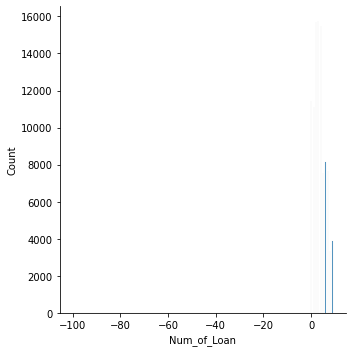

In [60]:
sns.displot(data=df, x="Num_of_Loan")
plt.show()

###Type_of_Loan

In [61]:
df["Type_of_Loan"].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [62]:
df["Type_of_Loan"].nunique()

6260

In [63]:
df[df["Type_of_Loan"]=="Not Specified"][["Customer_ID", "Num_of_Loan", "Type_of_Loan"]].groupby("Customer_ID").max("Num_of_Loan").max()

Num_of_Loan    1
dtype: int64

In [64]:
df["Type_of_Loan"].str.len().nunique()

160

This feature may contain vary useful information. But since it has more than 6000 diverse values, and analizing this number of values and preprocessing takes too much time, I just ignor that, and most probably remove that later. 

###Delay_from_due_date

In [65]:
df["Delay_from_due_date"].value_counts()

 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64

In [66]:
df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

Looks like in some cases people return their due payments sooner than the due date. On the other hand, in some cases, they pay more than two month after due date. 

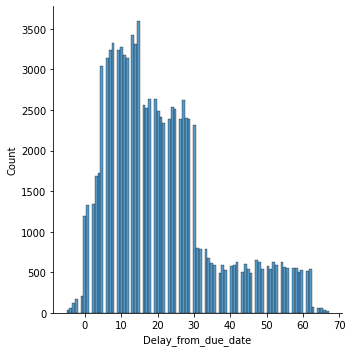

In [67]:
sns.displot(data=df, x="Delay_from_due_date")
plt.show()

###Num_of_Delayed_Payment

In [68]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_","") 

In [69]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"])

In [70]:
df["Num_of_Delayed_Payment"].value_counts().sort_index() 

-3.0         94
-2.0        234
-1.0        316
 0.0       1609
 1.0       1636
           ... 
 4344.0       1
 4360.0       1
 4384.0       1
 4388.0       1
 4397.0       1
Name: Num_of_Delayed_Payment, Length: 711, dtype: int64

So if a person has for instance 4 credit cards and 2 loans, most probably he/she has 6 paymnets monthly. It is possible for each of these payements to be paied sooner or later than their due date. If the number of delayed payment is negative (say -3 for eg.), that means the person has paid 3 of 6 payements sooner than their due.

In [240]:
# Turning the value of number of delayed payment equal to np.nan to -100
for i in range(len(df)):
    if df["Num_of_Delayed_Payment"][i] >28:
        df["Num_of_Delayed_Payment"][i] = -100
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].fillna(-100)

# Getting the indexes of those with -100 value for number of delayed payment, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Num_of_Delayed_Payment",-100)

# Creating a dataframe with unique customer id and mode of number of delayed payment available 
Num_of_Delayed_Payment_df = pd.DataFrame(df.iloc[:,[0,12]].groupby("Customer_ID")["Num_of_Delayed_Payment"].agg(pd.Series.mode))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
for id in Num_of_Delayed_Payment_df.index:
    x = type(Num_of_Delayed_Payment_df.loc[id, "Num_of_Delayed_Payment"])
    if x == np.ndarray:
        Num_of_Delayed_Payment_df.loc[id,"Num_of_Delayed_Payment"] = Num_of_Delayed_Payment_df.loc[id,"Num_of_Delayed_Payment"][0]

# Replacing any -100 number in df number of loan that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Num_of_Delayed_Payment"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Num_of_Delayed_Payment"][indx] = Num_of_Delayed_Payment_df.loc[id,"Num_of_Delayed_Payment"]

In [241]:
df[df["Num_of_Delayed_Payment"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


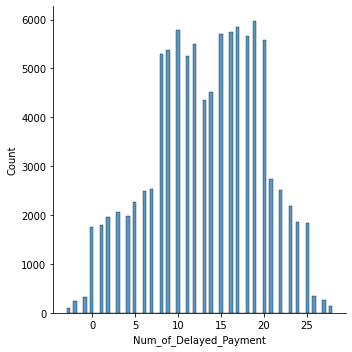

In [242]:
sns.displot(data=df, x="Num_of_Delayed_Payment")
plt.show()

###Changed_Credit_Limit

In [74]:
df["Changed_Credit_Limit"].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

The changed_Credit_Limit represents the percentage of a change in credit card limit. If it is equal to a number, then that is good. But if it is equal to "_", then it can mean zero or NAN. I consider it as NAN because chances are less to have no change in credit card limit. 

In [243]:
# Turning the value of Changed_Credit_Limit equal to "_" to -100
for i in range(len(df)):
    if df["Changed_Credit_Limit"][i] == "_":
        df["Changed_Credit_Limit"][i] = -100

# Getting the indexes of those with -100 value for Changed_Credit_Limit, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Changed_Credit_Limit",-100)

# Creating a dataframe with unique customer id and mode of Changed_Credit_Limit available 
Changed_Credit_Limit_df = pd.DataFrame(df.iloc[:,[0,13]].groupby("Customer_ID")["Changed_Credit_Limit"].agg(pd.Series.mode))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
for id in Changed_Credit_Limit_df.index:
    x = type(Changed_Credit_Limit_df.loc[id, "Changed_Credit_Limit"])
    if x == np.ndarray:
        Changed_Credit_Limit_df.loc[id,"Changed_Credit_Limit"] = Changed_Credit_Limit_df.loc[id,"Changed_Credit_Limit"][0]

# Replacing any -100 number in df that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Changed_Credit_Limit"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Changed_Credit_Limit"][indx] = Changed_Credit_Limit_df.loc[id,"Changed_Credit_Limit"]

In [244]:
df[df["Changed_Credit_Limit"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [245]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"])
df["Changed_Credit_Limit"].dtype

dtype('float64')

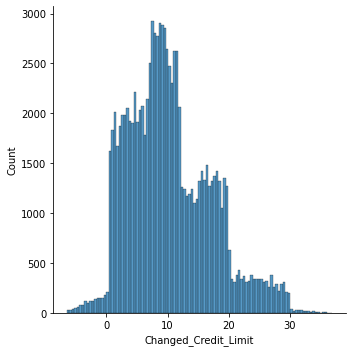

In [246]:
sns.displot(data=df, x="Changed_Credit_Limit")
plt.show()

###Num_Credit_Inquiries

In [79]:
df["Num_Credit_Inquiries"].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [80]:
print(df["Num_Credit_Inquiries"].mean(),"|",df["Num_Credit_Inquiries"].std(),"|", df["Num_Credit_Inquiries"].median(),"|",df["Num_Credit_Inquiries"].mode())

27.75425103279441 | 193.17733898003283 | 6.0 | 0    4.0
dtype: float64


There are some cases with NAN values, and also some cases with credit inquiries more than 17, which is mistakenly set into the dataset. 

In [249]:
# Turning the value of Num_Credit_Inquiries equal to np.nan to -100
for i in range(len(df)):
    if df["Num_Credit_Inquiries"][i] >17:
        df["Num_Credit_Inquiries"][i] = -100
df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].fillna(-100)

# Getting the indexes of those with -100 value for Num_Credit_Inquiries, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Num_Credit_Inquiries",-100)

# Creating a dataframe with unique customer id and mode of Num_Credit_Inquiries available 
Num_Credit_Inquiries_df = pd.DataFrame(df.iloc[:,[0,14]].groupby("Customer_ID")["Num_Credit_Inquiries"].agg(pd.Series.mode))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
for id in Num_Credit_Inquiries_df.index:
    x = type(Num_Credit_Inquiries_df.loc[id, "Num_Credit_Inquiries"])
    if x == np.ndarray:
        Num_Credit_Inquiries_df.loc[id,"Num_Credit_Inquiries"] = Num_Credit_Inquiries_df.loc[id,"Num_Credit_Inquiries"][0]

# Replacing any -100 number in df Num_Credit_Inquiries that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Num_Credit_Inquiries"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Num_Credit_Inquiries"][indx] = Num_Credit_Inquiries_df.loc[id,"Num_Credit_Inquiries"]

In [250]:
df[df["Num_Credit_Inquiries"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


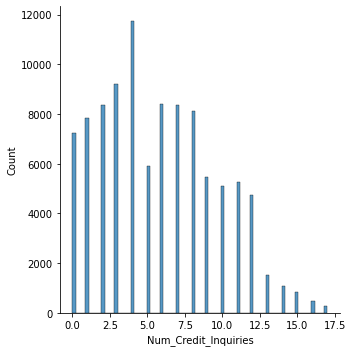

In [251]:
sns.displot(data=df, x="Num_Credit_Inquiries")
plt.show()

###Credit_Mix

In [84]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [85]:
df["Credit_Mix"] = df["Credit_Mix"].astype("object")

In [259]:
# Getting the indexes of those with -100 value for Credit_Mix, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Credit_Mix", "_")
idx = np.delete(idx, 0)

# Creating a dataframe with unique customer id and mode of Credit_Mix available 
Credit_Mix_df = pd.DataFrame(df.iloc[:,[0,15]].groupby("Customer_ID")["Credit_Mix"].agg(pd.Series.mode))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
for id in Credit_Mix_df.index:
    x = type(Credit_Mix_df.loc[id, "Credit_Mix"])
    if x == np.ndarray:
        Credit_Mix_df.loc[id,"Credit_Mix"] = Credit_Mix_df.loc[id,"Credit_Mix"][0]

# Replacing any -100 number in df Credit_Mix that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Credit_Mix"][indx] == "_":
        id = df["Customer_ID"][indx]
        df["Credit_Mix"][indx] = Credit_Mix_df.loc[id,"Credit_Mix"]

In [260]:
df[df["Credit_Mix"]==3]#.iloc[:,[0,15,24]]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


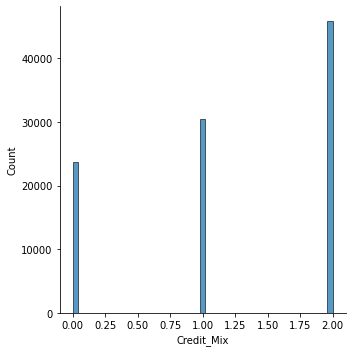

In [262]:
sns.displot(data=df, x="Credit_Mix")
plt.show()

###Outstanding_Debt

In [89]:
df["Outstanding_Debt"].value_counts().sort_index()

0.23      8
0.34      8
0.54      8
0.56      8
0.77      8
         ..
998.95    8
999.12    8
999.25    8
999.36    8
999.48    8
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [90]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")

In [91]:
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"])

In [92]:
print(df["Outstanding_Debt"].mean(), "|", df["Outstanding_Debt"].std(), "|", df["Outstanding_Debt"].median(), "|\n", df["Outstanding_Debt"].mode())

1426.220376 | 1155.1290257464573 | 1166.155 |
 0     460.46
1    1109.03
2    1151.70
3    1360.45
dtype: float64


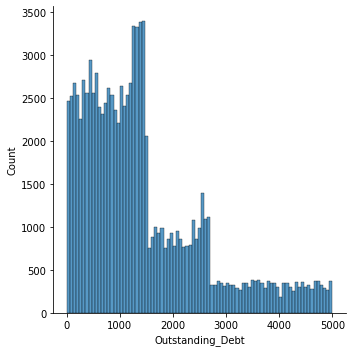

In [93]:
sns.displot(data=df, x="Outstanding_Debt")
plt.show()

###Credit_Utilization_Ratio

In [94]:
df["Credit_Utilization_Ratio"].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

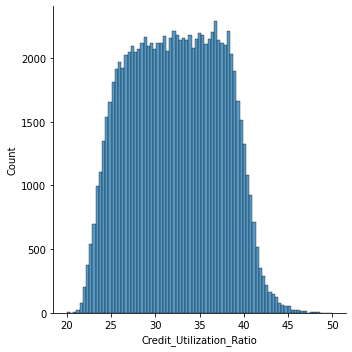

In [95]:
sns.displot(data=df, x="Credit_Utilization_Ratio")
plt.show()

###Credit_History_Age

In [96]:
df["Credit_History_Age"].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [97]:
# Turning the value of Credit_History_Age equal to np.nan to 0 Years and 0 Months
df["Credit_History_Age"] = df["Credit_History_Age"].fillna("0 Years and 0 Months")

# Turning the written form of history to the equivalant that of number of months
splited_history = [str(date).split(" ") for date in df["Credit_History_Age"]]
history_month = [int(splited_history[i][0]) * 12 + int(splited_history[i][3]) for i in range(len(splited_history))]
df["Credit_History_Age"] = history_month

# Getting the indexes of those with 0 Years and 0 Months value for Credit_History_Age, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Credit_History_Age", 0)
idx

# Creating a dataframe with unique customer id and mode of Credit_History_Age available 
Credit_History_Age_df = pd.DataFrame(df.iloc[:,[0,18]].groupby("Customer_ID")["Credit_History_Age"].agg(pd.Series.max))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very last one
# for id in Credit_History_Age_df.index:
#     x = type(Credit_History_Age_df.loc[id, "Credit_History_Age"])
#     if x == np.ndarray:
#         Credit_History_Age_df.loc[id,"Credit_History_Age"] = Credit_History_Age_df.loc[id,"Credit_History_Age"][-1]

# Replacing any 0 Years and 0 Months in df Credit_History_Age that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Credit_History_Age"][indx] == 0:
        id = df["Customer_ID"][indx]
        df["Credit_History_Age"][indx] = Credit_History_Age_df.loc[id,"Credit_History_Age"]

In [98]:
df.loc[99990,"Credit_History_Age"]=74

In [99]:
df[df["Credit_History_Age"] == 0]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [100]:
df["Credit_History_Age"].value_counts().sort_index()

1        2
2       15
3       20
4       35
5       42
      ... 
400    166
401    120
402     69
403     19
404     16
Name: Credit_History_Age, Length: 404, dtype: int64

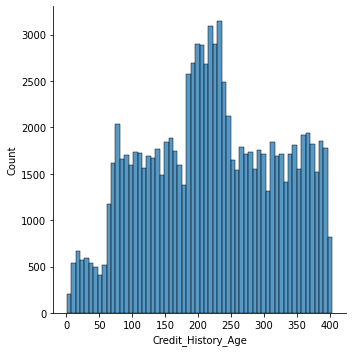

In [101]:
sns.displot(data=df, x="Credit_History_Age")
plt.show()

###Payment_of_Min_Amount

In [102]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

NM probably means Not Mentioned. When I look at the certain customer ids, I see some cases with eight month record, for which they have the value of this featur all equal to Yes or No, but one of the records is set as NM. This can be considered as NULL, and can be changed with the other values (Yes/No). 

In [ ]:
# Turning the value of Payment_of_Min_Amount equal to np.nan to -100
# for i in range(len(df)):
#     if df["Payment_of_Min_Amount"][i] == "_":
#         df["Payment_of_Min_Amount"][i] = -100
# df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].fillna(-100)

# Getting the indexes of those with -100 value for Payment_of_Min_Amount, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Payment_of_Min_Amount", "NM")
# idx = np.delete(idx, 0)

# Creating a dataframe with unique customer id and mode of Payment_of_Min_Amount available 
Payment_of_Min_Amount_df = pd.DataFrame(df.iloc[:,[0,19]].groupby("Customer_ID")["Payment_of_Min_Amount"].agg(pd.Series.mode))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
for id in Payment_of_Min_Amount_df.index:
    x = type(Payment_of_Min_Amount_df.loc[id, "Payment_of_Min_Amount"])
    if x == np.ndarray:
        Payment_of_Min_Amount_df.loc[id,"Payment_of_Min_Amount"] = Payment_of_Min_Amount_df.loc[id,"Payment_of_Min_Amount"][0]

# Replacing any -100 number in df Payment_of_Min_Amount that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Payment_of_Min_Amount"][indx] == "NM":
        id = df["Customer_ID"][indx]
        df["Payment_of_Min_Amount"][indx] = Payment_of_Min_Amount_df.loc[id,"Payment_of_Min_Amount"]

In [265]:
df[df["Payment_of_Min_Amount"]=="NM"]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


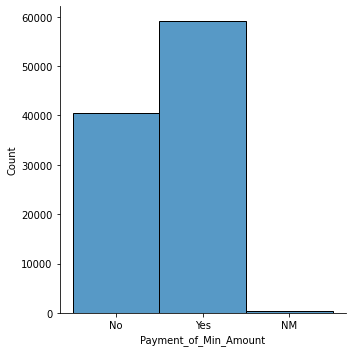

In [105]:
sns.displot(data=df, x="Payment_of_Min_Amount")
plt.show()

###Total_EMI_per_month

In [106]:
df["Total_EMI_per_month"].value_counts()

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [107]:
df["Total_EMI_per_month"].nunique()

14950

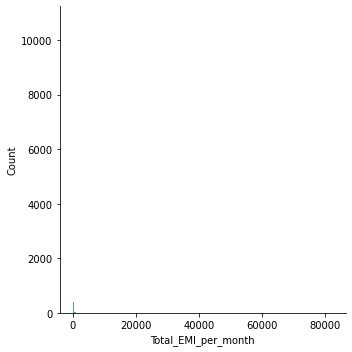

In [267]:
sns.displot(data=df, x="Total_EMI_per_month")
plt.show() 

Not too informative :(

###Amount_invested_monthly

In [109]:
df["Amount_invested_monthly"].value_counts() 

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [110]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.replace("_", "")

In [111]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"])

In [112]:
df["Amount_invested_monthly"].value_counts().sort_index()

0.000000         169
10.010194          1
10.011425          1
10.036600          1
10.053768          1
                ... 
1941.237454        1
1944.520747        1
1961.218850        1
1977.326102        1
10000.000000    4305
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [113]:
df[df["Amount_invested_monthly"].isnull()].iloc[:,[0,21,24]]

,Customer_ID,Amount_invested_monthly,Credit_Score
60,CUS_0x5407,NaN,Standard
61,CUS_0x5407,NaN,Standard
91,CUS_0xc0ab,NaN,Standard
111,CUS_0x6c66,NaN,Poor
181,CUS_0xac86,NaN,Standard
...,...,...,...
99862,CUS_0x1285,NaN,Standard
99872,CUS_0x3855,NaN,Good
99925,CUS_0x2654,NaN,Standard
99961,CUS_0x372c,NaN,Good


In [114]:
df[df["Amount_invested_monthly"]==10000].iloc[:,[0,21,24]]

,Customer_ID,Amount_invested_monthly,Credit_Score
18,CUS_0x2dbc,10000.0,Good
23,CUS_0x2dbc,10000.0,Standard
28,CUS_0xb891,10000.0,Standard
121,CUS_0x33d2,10000.0,Standard
142,CUS_0xfdb,10000.0,Standard
...,...,...,...
99879,CUS_0x3855,10000.0,Good
99882,CUS_0x47fa,10000.0,Standard
99919,CUS_0x1619,10000.0,Poor
99951,CUS_0x51b3,10000.0,Standard


Looks like cases with Amount_invested_monthly equal to 10000, are kind of a NULL value. So I replace them with np.nan and then fill them with the mean of their other months records. 

In [115]:
# Turning the value of Amount_invested_monthly equal to 10000 to np.nan, and then replace all the NAN with -100
for i in range(len(df)):
    if df["Amount_invested_monthly"][i] == 10000:
        df["Amount_invested_monthly"][i] = np.nan
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].fillna(-100)

# Getting the indexes of those with -100 value for Amount_invested_monthly, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Amount_invested_monthly",-100)

# Creating a dataframe with unique customer id and mean of Amount_invested_monthly available 
Amount_invested_monthly_df = pd.DataFrame(df.iloc[:,[0,21]].groupby("Customer_ID")["Amount_invested_monthly"].agg(pd.Series.mean))

# In some cases, the mode function takes two or more of the possible numbers. Here I will change them to the very first one
# for id in Amount_invested_monthly_df.index:
#     x = type(Amount_invested_monthly_df.loc[id, "Amount_invested_monthly"])
#     if x == np.ndarray:
#         Amount_invested_monthly_df.loc[id,"Amount_invested_monthly"] = Amount_invested_monthly_df.loc[id,"Amount_invested_monthly"][0]

# Replacing any -100 number in df Amount_invested_monthly that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Amount_invested_monthly"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Amount_invested_monthly"][indx] = Amount_invested_monthly_df.loc[id,"Amount_invested_monthly"]

In [116]:
df[df["Amount_invested_monthly"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


###Payment_Behaviour

In [117]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

There are 6 main categories, and one NULL category (ie. !@9#%9). 

In [118]:
payment_behaviour_dict = {"Low_spent_Small_value_payments":"LowSmall",
                          "Low_spent_Medium_value_payments":"LowMed",
                          "Low_spent_Large_value_payments":"LowLarg",
                          "High_spent_Small_value_payments":"HighSmall",
                          "High_spent_Medium_value_payments":"HighMed",
                          "High_spent_Large_value_payments":"HighLarg",
                          "!@9#%8":"Other"
                      }

df["Payment_Behaviour"] = df["Payment_Behaviour"].replace(to_replace=payment_behaviour_dict) 

In [119]:
df["Payment_Behaviour"].value_counts()

LowSmall     25513
HighMed      17540
LowMed       13861
HighLarg     13721
HighSmall    11340
LowLarg      10425
Other         7600
Name: Payment_Behaviour, dtype: int64

###Monthly_Balance

In [120]:
df2 = pd.read_csv(path+"train.csv")
df["Monthly_Balance"] = df2["Monthly_Balance"]
del df2

In [121]:
df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [122]:
# Turning the value of Monthly_Balance equal to 10000 to np.nan, and then replace all the __-333333333333333333333333333__ with -100
for i in range(len(df)):
    if df["Monthly_Balance"][i] == "__-333333333333333333333333333__":
        df["Monthly_Balance"][i] = -100
df["Monthly_Balance"] = df["Monthly_Balance"].fillna(-100)

In [123]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"])

In [268]:
# Getting the indexes of those with -100 value for Monthly_Balance, along the indexes of their previous and following records
idx = get_3Indexes_By_Column_Value(df,"Monthly_Balance",-100)

# Creating a dataframe with unique customer id and mean of Monthly_Balance available 
Monthly_Balance_df = pd.DataFrame(df.iloc[:,[0,23]].groupby("Customer_ID")["Monthly_Balance"].agg(pd.Series.mean))

# Replacing any -100 number in df Amount_invested_monthly that are assigned to each customer id with that of new dataframe 
for indx in idx:
    if df["Monthly_Balance"][indx] == -100:
        id = df["Customer_ID"][indx]
        df["Monthly_Balance"][indx] = Monthly_Balance_df.loc[id,"Monthly_Balance"]

In [269]:
df[df["Monthly_Balance"]==-100]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


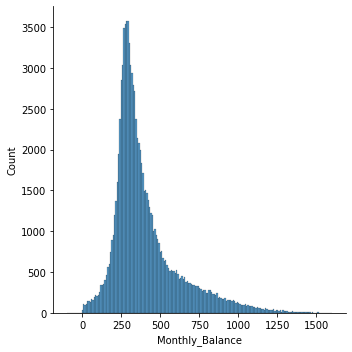

In [126]:
sns.displot(data=df, x="Monthly_Balance")
plt.show()

In [130]:
# Dropping the type of loan and customer id
dropped_df = df.drop(["Type_of_Loan", "Customer_ID"], axis=1)

In [132]:
dropped_df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

Now all of the columns are clear, except for the Type_of_Loan, which I decided to removeit earlier. I also now need to remove customer_id as its usefulness is over. 

In [184]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

##<b>DATA TRANSFORMATION</B>
##Now I will start to manipulate the columns for feature engineering.

### First I will do one-hot encoding for Occupation, Credit_Mix, Payment_of_Min_Amount, and Payment_Behaviour. 

In [ ]:
encoded_df = pd.get_dummies(dropped_df, columns=["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"], drop_first=True)


In [187]:
encoded_df.shape 

(100000, 42)

This way I have added 17 columns to my dataset.

I also have to turn the target variable into a numeric column. I simply replace the values <b>Good, Standard, and Bad</b> with 0, 1, and 2 respectively.

In [189]:
encoded_df["Credit_Score"] = encoded_df["Credit_Score"].replace({"Good":0,"Standard":1, "Poor":2})
encoded_df["Credit_Score"].value_counts()

1    53174
2    28998
0    17828
Name: Credit_Score, dtype: int64

### Now Second step is to normalize the dataset, because there are columns with diverse range of numbers, some of them have four or five figure numbers, and some of them are just 0 and 1. 
for this purpose, I use MinMaxScaler from scikit learn. 
<b>But before that, I have to split my data into train and validation set. </b>

In [336]:
x = encoded_df.drop("Credit_Score", axis=1)
y= encoded_df.Credit_Score

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1988,shuffle=True, stratify=y)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [337]:
x_train.shape

(80000, 41)

### Third step is to perform feature selection. 
for feature selection, at this stage, I apply Recursive Feature Elimination.

In [338]:
# Simple classifier to determine the importance of the feature selector
clf = LogisticRegression()
# Creating a selector variable 
feature_selector = RFE(clf, n_features_to_select=20, step=1)
# Training the selector with train dataset
feature_selector.fit(x_train, y_train)
# Transforming the train and test data
fs_x_train = feature_selector.transform(x_train)
fs_x_val  = feature_selector.transform(x_val) 

In [339]:
# Chatching the selected features
x.iloc[:,feature_selector.get_support(indices=True)].columns 

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_LowLarg', 'Payment_Behaviour_LowMed',
       'Payment_Behaviour_LowSmall', 'Payment_Behaviour_Other'],
      dtype='object')

##Now it is time to create my first model. For this time I use Random Forest as a classifier. Using this algorithm, I calculate the accuracy and other metrics for training and validation datasets. 

In [340]:
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(fs_x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [341]:
rfc.score(fs_x_train, y_train)

0.970875

Validation results:
Accuracy: 0.75985,	Precision: 0.7356570686295735,
F1 Score: 0.7306348438423909, 	Recall score: 0.7256807261078484



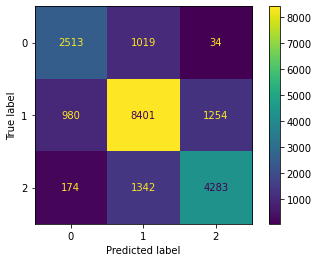

In [342]:
y_pred = rfc.predict(fs_x_val)
acc = accuracy_score(y_val, y_pred, normalize=True)
f1_ = f1_score(y_val, y_pred, labels=[0,2], average="micro")
prec = precision_score(y_val, y_pred, labels=[0,2], average="micro")
rec = recall_score(y_val, y_pred, labels=[0,2], average="micro")
cm = confusion_matrix(y_val, y_pred, labels=rfc.classes_)

print(f"Validation results:\nAccuracy: {acc},\tPrecision: {prec},\nF1 Score: {f1_}, \tRecall score: {rec}")
print()

disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

As it is shown above, we can distinguish a considerable overfitting in our model. Because it learns every aspect of our training model, but when it comes to the validation, it is not as good as expected. 
<p> For this, I have to make some changes in preprocessing. For instance, I have not done any balancing in the dataset. Or I have selected 20 columns for feature selection, which might be too much or too less. 
<p> Let's see what happens. 

In [343]:
# Creating oversampler and undersampler
oversample  = SMOTE({0:33333, 2:33333})
undersample = RandomUnderSampler({1:33334})

# Creating the new data with oversampling and undersampling
resmpl_x, resmpl_y = oversample.fit_resample(x, y)
resmpl_x, resmpl_y = undersample.fit_resample(resmpl_x, resmpl_y)

resmpl_y.value_counts()

1    33334
0    33333
2    33333
Name: Credit_Score, dtype: int64

Now oversampling and undersasmpling are done. 
<p> Now I have to perform the feature selection step again. 

In [349]:
x_train, x_val, y_train, y_val = train_test_split(resmpl_x, resmpl_y, test_size=0.2, shuffle=True, random_state=1988, stratify=resmpl_y)

clf = LogisticRegression()
# Creating new feature selector, with 15 features to select 
feature_selector = RFE(clf, n_features_to_select=15, step=1, verbose=0)
fs_resmpl_x_train = feature_selector.fit_transform(x_train, y_train)
fs_resmpl_x_val   = feature_selector.transform(x_val) 

In [252]:
# Chatching the selected features (15 features)
x.iloc[:,feature_selector.get_support(indices=True)].columns 

Index(['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_HighMed', 'Payment_Behaviour_HighSmall',
       'Payment_Behaviour_LowLarg', 'Payment_Behaviour_LowMed',
       'Payment_Behaviour_LowSmall'],
      dtype='object')

Training score: 0.96765


Validation results:
Accuracy: 0.74485,	Precision: 0.7728935049736688,
F1 Score: 0.7825958155897055, 	Recall score: 0.7925448136203405



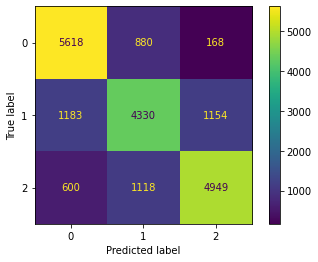

In [350]:
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(fs_resmpl_x_train, y_train)

print(f"Training score: {rfc.score(fs_resmpl_x_train, y_train)}\n\n")

y_pred = rfc.predict(fs_resmpl_x_val)
acc = accuracy_score(y_val, y_pred, normalize=True)
f1_ = f1_score(y_val, y_pred, labels=[0,2], average="micro")
prec = precision_score(y_val, y_pred, labels=[0,2], average="micro")
rec = recall_score(y_val, y_pred, labels=[0,2], average="micro")
cm = confusion_matrix(y_val, y_pred, labels=rfc.classes_)

print(f"Validation results:\nAccuracy: {acc},\tPrecision: {prec},\nF1 Score: {f1_}, \tRecall score: {rec}")
print()

disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

By doing so, the training accuracy reduced by 0.4 percent, and validation accuracy reduced by 2%. 

Let's see if there is any relation between these 15 features that has been selected with the RFE. 

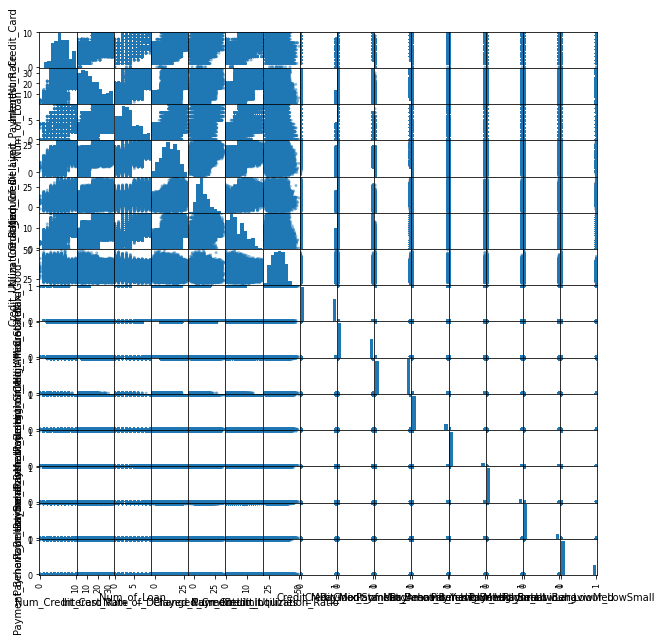

In [273]:
# Convert NumPy array to Pandas DataFrame
x_train_df = pd.DataFrame(fs_resmpl_x_train, columns=x.iloc[:,feature_selector.get_support(indices=True)].columns )

# Create scatter matrix
sm = pd.plotting.scatter_matrix(x_train_df, figsize=(10, 10))

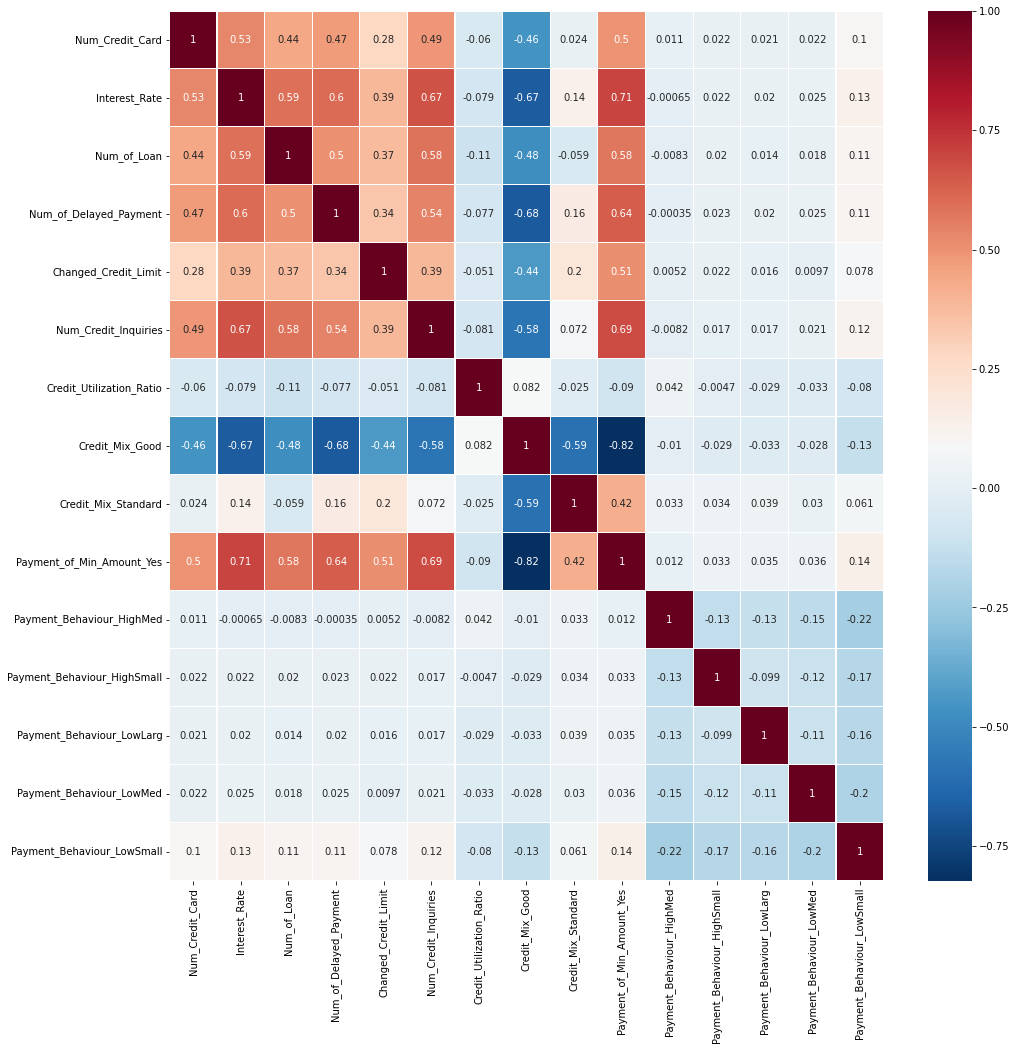

In [275]:
pearson_corr = x_train_df.corr(method='pearson')
plt.figure(figsize=(16,16))
sns.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2)
plt. show()

From here, I want to check if it is possible to do feature selection by neural network. 

In [148]:
### Plot training and validation accuracy and loss over time
def plot_history(history):

    # Extract accuracy and loss values (in list form) from the history
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a list of epoch numbers
    epochs = range(1, len(acc) + 1)

    # Plot training and validation loss values over time
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, loss, color='blue', marker='.', label='Training loss')
    plt.plot(epochs, val_loss, color='orange', marker='.', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    # Plot training and validation accuracies over time
    plt.figure(figsize=(6, 4))
    plt.plot(epochs, acc, color='blue', marker='.', label='Training acc')
    plt.plot(epochs, val_acc, color='orange', marker='.', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

In [149]:
### Plot ROC curve
def plot_roc(model, X_test, Y_test):

    # Set up figure
    plt.figure(figsize=(4, 4))
    plt.plot([0, 1], [0, 1], 'k--')

    # Run inference
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())

    # Plot
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format("model", auc(fpr, tpr)))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [150]:
### Generate feature importance rankings
def score_features(model, feature_names):
  
    # Get weights (without the bias terms)
    weights = model.layers[0].get_weights()[0]

    # Take RMS of each set of weights (i.e. weights feeding into nodes for each feature)
    rms = np.sqrt(np.sum(np.square(weights), axis=1) / weights.shape[1])

    # Normalize the RMS scores
    norm_rms = rms / np.sum(rms)

    # Sort features by importance ranking (RMS)
    zip_features = zip(feature_names, rms, norm_rms)
    zip_features = sorted(zip_features, key = lambda x: x[1], reverse=True)

    # Print feature importance
    print("Feature importance (highest to lowest)")
    print("Feature name\t:\tRMS value\t:\tNormalized RMS")
    for name, rms, norm_rms in zip_features:
        print(name, "\t:\t", rms, "\t:\t", norm_rms)

In [151]:
from sklearn.preprocessing import OneHotEncoder


In [352]:

enc = OneHotEncoder()
y_train_enc = enc.fit_transform(y_train[:, np.newaxis]).toarray()
x_train_enc = np.array(x_train)
y_val_enc = enc.fit_transform(y_val[:, np.newaxis]).toarray()
x_val_enc = np.array(x_val)

In [353]:
# Build model

# Settings
bias = True
kernel_reg = tf.keras.regularizers.L1(0.001)
bias_reg = tf.keras.regularizers.L1(0.001)
activity_reg = None

# Get dimensions
n_features = x_train_enc.shape[1]
n_classes = y_train_enc.shape[1]

# First layer: adjust the regularizers for feature importance
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(41,
                                input_dim=n_features, 
                                use_bias=bias,
                                kernel_regularizer=kernel_reg,
                                bias_regularizer=bias_reg,
                                activity_regularizer=activity_reg,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Second layer
model.add(tf.keras.layers.Dense(128,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Third layer
model.add(tf.keras.layers.Dense(64,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Output layer
model.add(tf.keras.layers.Dense(n_classes,
                                activation='softmax'))

# Configure the model's training settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Print out model summary and first layer weights
print(model.summary())
print("First layer weights:\n", model.layers[0].get_weights())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 41)                1722      
                                                                 
 dropout_35 (Dropout)        (None, 41)                0         
                                                                 
 dense_48 (Dense)            (None, 128)               5376      
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 64)                8256      
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 3)               

In [354]:
resmpl_x.shape

(100000, 41)

In [355]:
### Train the model

# Settings
batch_size = 200
epochs = 100

# Train 
history = model.fit(x_train_enc, 
                    y_train_enc, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_val_enc, y_val_enc))

Epoch 1/100
400/400 [==============================] - 2s 4ms/step - loss: 3926.0212 - acc: 0.3490 - val_loss: 104.6052 - val_acc: 0.3359
Epoch 2/100
400/400 [==============================] - 1s 3ms/step - loss: 239.6807 - acc: 0.3334 - val_loss: 1.2140 - val_acc: 0.3334
Epoch 3/100
400/400 [==============================] - 1s 3ms/step - loss: 19.8214 - acc: 0.3344 - val_loss: 1.2020 - val_acc: 0.3334
Epoch 4/100
400/400 [==============================] - 1s 3ms/step - loss: 13.4519 - acc: 0.3328 - val_loss: 1.1943 - val_acc: 0.3334
Epoch 5/100
400/400 [==============================] - 1s 3ms/step - loss: 5.1261 - acc: 0.3316 - val_loss: 1.1886 - val_acc: 0.3334
Epoch 6/100
400/400 [==============================] - 1s 3ms/step - loss: 2.8389 - acc: 0.3314 - val_loss: 1.1832 - val_acc: 0.3334
Epoch 7/100
400/400 [==============================] - 1s 3ms/step - loss: 1.9866 - acc: 0.3329 - val_loss: 1.1775 - val_acc: 0.3334
Epoch 8/100
400/400 [==============================] - 1s 3m

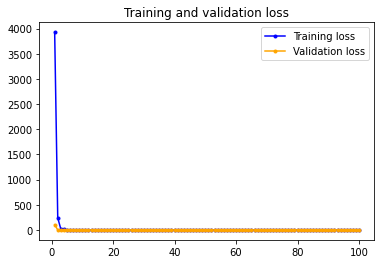

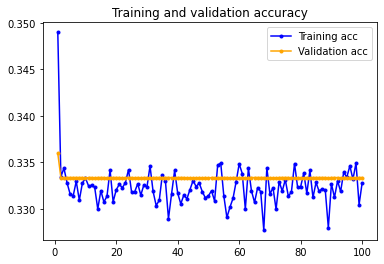

625/625 [==============================] - 1s 937us/step


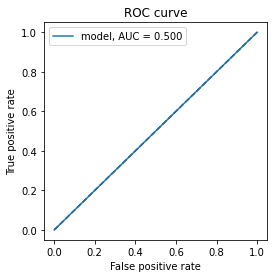

In [359]:
# Plot history and ROC curve
plot_history(history)
plot_roc(model, x_val_enc, y_val_enc)

In [360]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
scl.fit(x_train_enc)
scl_x_train_enc = scl.transform(x_train_enc)
scl_x_val_enc = scl.transform(x_val_enc)

In [362]:
### Train the model

# Settings
batch_size = 20
epochs = 100

# Train 
history = model.fit(scl_x_train_enc, 
                    y_train_enc, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(scl_x_val_enc, y_val_enc))

Epoch 1/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3333 - val_loss: 1.0989 - val_acc: 0.3333
Epoch 2/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3340 - val_loss: 1.0989 - val_acc: 0.3334
Epoch 3/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3345 - val_loss: 1.0989 - val_acc: 0.3333
Epoch 4/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3347 - val_loss: 1.0989 - val_acc: 0.3333
Epoch 5/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3327 - val_loss: 1.0988 - val_acc: 0.3333
Epoch 6/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3324 - val_loss: 1.0992 - val_acc: 0.3334
Epoch 7/100
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0989 - acc: 0.3336 - val_loss: 1.0988 - val_acc: 0.3334
Epoch 8/100
3763/4000 [===========================>..] 

KeyboardInterrupt: ignored

Neural Network didn't go well. As it shows up in the first try, it is as good as simply guessing. No need to machine!
The second try was after normalizing the data, which just worsen the results. So I stop moving forward on this part. 

Now I will prepare a gridsearch so that I can try multiple states and hyperparameter tunings. 

In [270]:
df.shape

(100000, 25)

In [139]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [162]:
obj_cols = ["Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
for col in obj_cols:
    df[col] = lab_enc.fit_transform(df[col])

In [164]:
df[obj_cols].head()

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,1,1,2
1,12,128,1,1,3
2,12,128,1,1,4
3,12,128,1,1,5
4,12,128,1,1,1


In [184]:
x = df.drop(["Customer_ID", "Credit_Score"], axis=1)
y = df.Credit_Score

one_enc = OneHotEncoder()
y = one_enc.fit_transform(y[:, np.newaxis]).toarray()
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [191]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1988, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [192]:
x_train.shape

(70000, 23)

In [193]:
# Build model

# Settings
bias = True
kernel_reg = tf.keras.regularizers.L1(0.001)
bias_reg = tf.keras.regularizers.L1(0.001)
activity_reg = None

# Get dimensions
n_features = x_train.shape[1]
n_classes = y_train.shape[1]

# First layer: adjust the regularizers for feature importance
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(23,
                                input_dim=n_features, 
                                use_bias=bias,
                                kernel_regularizer=kernel_reg,
                                bias_regularizer=bias_reg,
                                activity_regularizer=activity_reg,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Second layer
model.add(tf.keras.layers.Dense(128,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Third layer
model.add(tf.keras.layers.Dense(64,
                                activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))

# Output layer
model.add(tf.keras.layers.Dense(n_classes,
                                activation='softmax'))

# Configure the model's training settings
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Print out model summary and first layer weights
print(model.summary())
print("First layer weights:\n", model.layers[0].get_weights())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 23)                552       
                                                                 
 dropout_6 (Dropout)         (None, 23)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               3072      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [194]:
### Train the model

# Settings
batch_size = 10
epochs = 100

# Train 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(np.array(x_test), y_test))

Epoch 1/100
7000/7000 [==============================] - 15s 2ms/step - loss: 0.7950 - acc: 0.6636 - val_loss: 0.7195 - val_acc: 0.6920
Epoch 2/100
7000/7000 [==============================] - 12s 2ms/step - loss: 0.7333 - acc: 0.6818 - val_loss: 0.7096 - val_acc: 0.6969
Epoch 3/100
7000/7000 [==============================] - 12s 2ms/step - loss: 0.7260 - acc: 0.6840 - val_loss: 0.7103 - val_acc: 0.6966
Epoch 4/100
7000/7000 [==============================] - 12s 2ms/step - loss: 0.7239 - acc: 0.6851 - val_loss: 0.7109 - val_acc: 0.6963
Epoch 5/100
7000/7000 [==============================] - 13s 2ms/step - loss: 0.7248 - acc: 0.6845 - val_loss: 0.7097 - val_acc: 0.6981
Epoch 6/100
7000/7000 [==============================] - 12s 2ms/step - loss: 0.7220 - acc: 0.6866 - val_loss: 0.7066 - val_acc: 0.6973
Epoch 7/100
7000/7000 [==============================] - 12s 2ms/step - loss: 0.7220 - acc: 0.6881 - val_loss: 0.7146 - val_acc: 0.6929
Epoch 8/100
7000/7000 [=========================

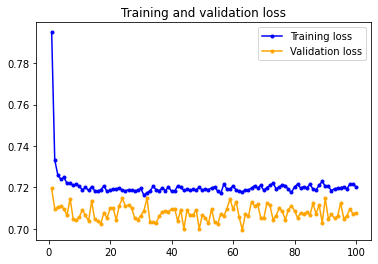

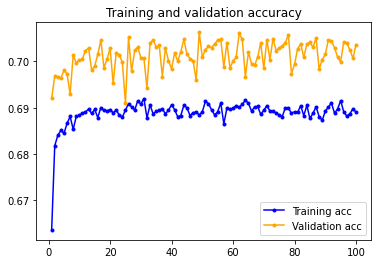

938/938 [==============================] - 1s 965us/step


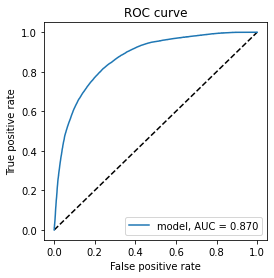

In [195]:
# Plot history and ROC curve
plot_history(history)
plot_roc(model, x_test, y_test)

In [196]:
score_features(model, feature_names=x.columns)

Feature importance (highest to lowest)
Feature name	:	RMS value	:	Normalized RMS
Credit_Mix 	:	 0.19439669 	:	 0.12631285
Outstanding_Debt 	:	 0.1818287 	:	 0.11814656
Delay_from_due_date 	:	 0.15936497 	:	 0.103550345
Num_Credit_Card 	:	 0.13810602 	:	 0.089736946
Changed_Credit_Limit 	:	 0.11725596 	:	 0.076189235
Interest_Rate 	:	 0.10513592 	:	 0.06831401
Payment_of_Min_Amount 	:	 0.08212466 	:	 0.05336202
Num_Bank_Accounts 	:	 0.06082039 	:	 0.039519176
Payment_Behaviour 	:	 0.059947066 	:	 0.038951717
Num_of_Delayed_Payment 	:	 0.058232673 	:	 0.03783776
Num_Credit_Inquiries 	:	 0.04787279 	:	 0.031106232
Monthly_Balance 	:	 0.0453242 	:	 0.029450238
Num_of_Loan 	:	 0.045083415 	:	 0.029293785
Amount_invested_monthly 	:	 0.044564474 	:	 0.028956594
Credit_History_Age 	:	 0.030983344 	:	 0.020132001
Annual_Income 	:	 0.024650315 	:	 0.016017
Age 	:	 0.024075171 	:	 0.01564329
Monthly_Inhand_Salary 	:	 0.02335104 	:	 0.015172771
Type_of_Loan 	:	 0.020602314 	:	 0.013386736
Month 	:

Based on the Neural Network, there are 7 features with highest impression on the network. These features can be selected for final modeling. These features are as follow:
<p><b>Credit_Mix, Outstanding_Debt, Delay_from_due_date, Num_Credit_Card, Changed_Credit_Limit, Interest_Rate, Payment_of_Min_Amount</b></p>

#Now after observing the ANN works for the unsampled data, now I want to do manual sampling. The reason is SMOTE and RandomUnderSampling did not work properly. 

In [199]:
# Creating three different dataset for each class
std_df = df[df["Credit_Score"]=="Standard"].sample(n=17828)
poor_df = df[df["Credit_Score"]=="Poor"].sample(n=17828)
good_df = df[df["Credit_Score"]=="Good"]

In [209]:
# Concatinating the three new same size datassets and shuffle it with sample function
new_df = pd.concat([std_df,poor_df,good_df], axis=0).sample(frac=1.0).sample(frac=1.0)

In [211]:
new_df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
27795,CUS_0x26b0,1,45,4,14584.200,997.350000,8,9,15,4,...,2,1555.23,30.363718,76,2,46.138283,49.748975,5,293.847742,Poor
78091,CUS_0xa110,1,31,12,67151.600,5497.966667,5,4,11,7,...,2,41.67,36.783564,65,2,369.929379,74.190883,0,345.676405,Good
80432,CUS_0x7900,4,38,11,38873.380,3124.448333,9,9,21,5,...,0,3535.04,26.007340,147,2,142.441435,164.989646,3,275.013752,Poor
16935,CUS_0x7871,2,39,2,38331.370,2996.280833,3,5,1,4,...,1,1473.17,30.380716,227,1,70.813313,61.441232,1,417.373538,Good
99258,CUS_0x509d,7,22,3,78668.000,6539.666667,8,4,17,4,...,2,1211.41,35.759761,109,2,210.592362,398.550776,3,314.823528,Standard
82424,CUS_0x85bb,4,50,14,20203.625,1722.635417,0,5,5,0,...,1,318.06,31.152832,346,1,0.000000,19.978080,0,392.285462,Poor
54684,CUS_0x6b3a,8,38,3,31680.740,2670.061667,6,6,26,3,...,0,1280.16,28.638995,98,2,72.435643,186.512099,5,298.058425,Standard
86339,CUS_0xa223,1,24,4,28253.330,1368.402604,1,6,5,4,...,1,1104.91,30.816926,307,1,93.608031,69.464854,2,270.719779,Good
51395,CUS_0x88fa,1,28,5,17642.100,1386.175000,2,7,7,3,...,1,548.31,24.594266,267,1,39.520431,140.398107,5,248.698962,Standard
2371,CUS_0xfdd,1,14,12,32128.240,1762.235556,6,4,12,7,...,2,465.04,27.966675,88,2,103.456213,212.718426,6,223.160695,Standard


In [212]:
obj_cols = ["Occupation", "Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
for col in obj_cols:
    new_df[col] = lab_enc.fit_transform(new_df[col])

In [213]:
x = new_df.drop(["Customer_ID", "Credit_Score"], axis=1)
y = new_df.Credit_Score

one_enc = OneHotEncoder()
y = one_enc.fit_transform(y[:, np.newaxis]).toarray()
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [214]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1988, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [215]:
### Train the model

# Settings
batch_size = 10
epochs = 100

# Train 
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(np.array(x_test), y_test))

Epoch 1/100
3744/3744 [==============================] - 7s 2ms/step - loss: 0.7447 - acc: 0.7160 - val_loss: 0.7252 - val_acc: 0.7219
Epoch 2/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7428 - acc: 0.7157 - val_loss: 0.7195 - val_acc: 0.7204
Epoch 3/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7405 - acc: 0.7166 - val_loss: 0.7169 - val_acc: 0.7229
Epoch 4/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7394 - acc: 0.7161 - val_loss: 0.7303 - val_acc: 0.7181
Epoch 5/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7398 - acc: 0.7158 - val_loss: 0.7300 - val_acc: 0.7198
Epoch 6/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7394 - acc: 0.7166 - val_loss: 0.7231 - val_acc: 0.7197
Epoch 7/100
3744/3744 [==============================] - 6s 2ms/step - loss: 0.7388 - acc: 0.7159 - val_loss: 0.7257 - val_acc: 0.7193
Epoch 8/100
3744/3744 [==============================] 

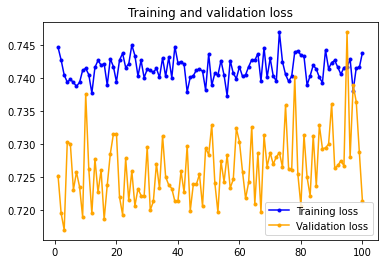

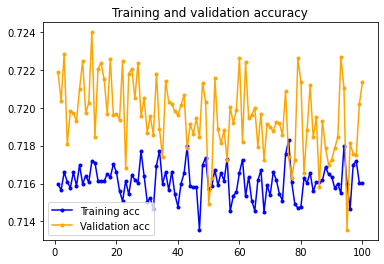

502/502 [==============================] - 0s 955us/step


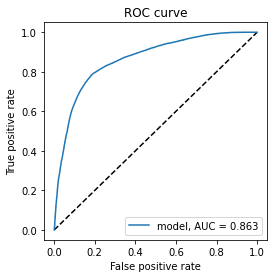

In [216]:
# Plot history and ROC curve
plot_history(history)
plot_roc(model, x_test, y_test)

In [217]:
score_features(model, feature_names=x.columns)

Feature importance (highest to lowest)
Feature name	:	RMS value	:	Normalized RMS
Outstanding_Debt 	:	 0.20811719 	:	 0.12596636
Credit_Mix 	:	 0.20606552 	:	 0.12472455
Delay_from_due_date 	:	 0.17471324 	:	 0.10574807
Num_Credit_Card 	:	 0.15202507 	:	 0.09201568
Interest_Rate 	:	 0.101880796 	:	 0.061665032
Changed_Credit_Limit 	:	 0.1018656 	:	 0.06165583
Payment_of_Min_Amount 	:	 0.09024203 	:	 0.054620475
Payment_Behaviour 	:	 0.07046341 	:	 0.042649142
Num_of_Delayed_Payment 	:	 0.06934742 	:	 0.04197367
Monthly_Balance 	:	 0.060786366 	:	 0.03679195
Num_Bank_Accounts 	:	 0.058210388 	:	 0.035232797
Num_Credit_Inquiries 	:	 0.054973617 	:	 0.03327369
Amount_invested_monthly 	:	 0.047048252 	:	 0.02847673
Num_of_Loan 	:	 0.035542015 	:	 0.021512391
Age 	:	 0.03529185 	:	 0.021360975
Credit_History_Age 	:	 0.033283096 	:	 0.020145142
Month 	:	 0.03162816 	:	 0.019143466
Type_of_Loan 	:	 0.025369188 	:	 0.0153551195
Monthly_Inhand_Salary 	:	 0.023754997 	:	 0.014378103
Occupation 	:

This time too, there are 7 features with highest normalized RMS (between 0.05 to 0.126). The features are:
<p><b>Outstanding_Debt, Credit_Mix, Delay_from_due_date, Num_Credit_Card 	Interest_Rate, Changed_Credit_Limit, Payment_of_Min_Amount</b></p>

These 7 features are exactly the same as those in the previous state, wherein I did not do any undersampling. 
##Now I will take these 7 features and perform my random forest model based on that. 

In [218]:
selected_features = ["Outstanding_Debt", "Credit_Mix", "Delay_from_due_date", "Num_Credit_Card", "Interest_Rate", "Changed_Credit_Limit", "Payment_of_Min_Amount"] 

Training scores; 0.9257438965756718

Accuracy score: 0.7615605135236196
Precision score: 0.0
F1 score: 0.0
Recall score: 0.0


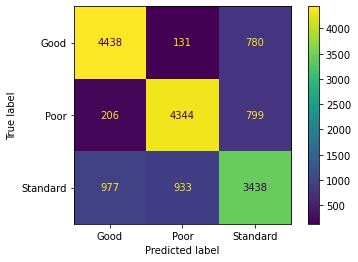

In [227]:
x = new_df[selected_features]
y = new_df.Credit_Score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1988, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(x_train, y_train)
print(f"Training scores; {rfc.score(x_train, y_train)}", end='\n\n')
y_pred = rfc.predict(x_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred, normalize=True)}")
print(f"Precision score: {precision_score(y_test, y_pred, labels=[0,2], average='weighted')}")
print(f"F1 score: {f1_score(y_test, y_pred, labels=[0,2], average='weighted')}")
print(f"Recall score: {recall_score(y_test, y_pred, labels=[0,2], average='weighted')}")

cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rfc.classes_)
disp.plot()
plt.show()


In [272]:
# from sklearn.model_selection import ParameterGrid

parameters = {"criterion": ["gini", "entropy"],
              "n_estimators": [5,10,20],
              "max_depth": [5,7,9],
              "min_samples_split": [1000,1500], 
              "max_features": ["auto", "sqrt"], 
              "max_samples": [20000,10000]
              }
# param_size = ParameterGrid(parameters)
# print(len(param_size))

rfc = RandomForestClassifier()
cv = 5
grid_rfc = GridSearchCV(rfc, parameters, 
                        cv=cv, scoring="accuracy",
                        n_jobs=-1)

Training score: 0.7159036273305198


Validation results:
Accuracy: 0.7113299264614235,	Precision: 0.0,
F1 Score: 0.0, 	Recall score: 0.0



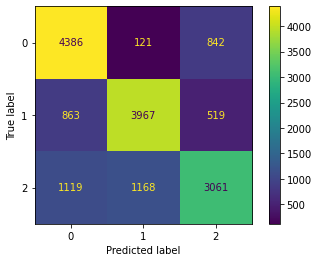

In [276]:
grid_rfc.fit(x_train, y_train)
print(f"Training score: {grid_rfc.score(x_train, y_train)}\n\n")

y_pred = grid_rfc.predict(x_test)
acc = accuracy_score(y_test, y_pred, normalize=True)
f1_ = f1_score(y_test, y_pred, labels=[0,2], average="micro")
prec = precision_score(y_test, y_pred, labels=[0,2], average="micro")
rec = recall_score(y_test, y_pred, labels=[0,2], average="micro")
cm = confusion_matrix(y_test, y_pred)

print(f"Validation results:\nAccuracy: {acc},\tPrecision: {prec},\nF1 Score: {f1_}, \tRecall score: {rec}")
print()

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()